## Icosahedron coordinates

The vertices of an icosahedron centered at the origin with an edge-length of 2 and a circumscribed sphere radius of $ 2\sin(2\pi/5)$ are described by circular permutations of

$ (0, \pm 1, \pm  \phi) $

where $\phi = (1 + \sqrt{5})/2$.


In [109]:
import os, sys
import numpy as np

atoms = []

UseSphereStacking = False
UseIcosahedron = True

if UseIcosahedron:
    phi = (1.0 + (5.0)**0.5)/2.0

    x = [0.0, 1.0, phi]
    atoms.append( (x[0], x[1], x[2]) )
    atoms.append( (x[0], -x[1], x[2]) )
    atoms.append( (x[0], x[1], -x[2]) )
    atoms.append( (x[0], -x[1], -x[2]) )

    x = [1.0, phi, 0.0]
    atoms.append( (x[0],  x[1], x[2]) )
    atoms.append( (-x[0], x[1], x[2]) )
    atoms.append( (x[0], -x[1], x[2]) )
    atoms.append( (-x[0], -x[1], x[2]) )

    x = [phi, 0.0, 1.0,]
    atoms.append( (x[0],  x[1], x[2]) )
    atoms.append( (-x[0], x[1], x[2]) )
    atoms.append( (x[0], x[1], -x[2]) )
    # atoms.append( (-x[0], x[1], -x[2]) )

    # the last atom will not be connected to anything...
    # put in the origin
    atoms.append( (0., 0., 0.) )

    

    
else:

    a = 0.15  # radius (in nm)
    h = a*(2.0/3.0)**0.5 # height of a tetrahedron 

    # middle row, on x-y plane
    for angle in np.arange(np.pi/3.0, 5.0*np.pi/3.0, np.pi/3.0):
        atoms.append( (a*np.cos(angle), a*np.sin(angle), 0.) )

    # top row
    if (1):
        atoms.append(   (0.5*a, np.sqrt(3.0)/6.0*a, h) )
        atoms.append(   (-0.5*a, np.sqrt(3.0)/6.0*a, h) )
        atoms.append(   (0, -1.0/np.sqrt(3.0)*a, h) )

    # bottom row
    if (1):
        atoms.append(   (-0.5*a, -np.sqrt(3.0)/6.0*a, -h) )
        atoms.append(   (0.5*a, -np.sqrt(3.0)/6.0*a, -h) )
        atoms.append(   (0, 1.0/np.sqrt(3.0)*a, -h) )

            
    atoms = np.array( atoms )


    


### What size should the pocket be to maximize vdW interactions?

Gromacs defines the Lennard-Jones potential using the $\sigma$ (nm) and $\epsilon$ (kJ/mol) parameters:

$V_{LJ}(r) = 4\epsilon \big( \big( \frac{\sigma}{r} \big)^{12} - \big(\frac{\sigma}{r}\big)^6 \big) $ 

The minimum of this curve can be found by taking its derivative and setting to zero

$ \frac{dV_{LJ}(r)}{dr} = 4\epsilon \big( 12 \big( \frac{\sigma}{r} \big)^{11} - 6 \big( \frac{\sigma}{r} \big)^{5} \big)(-\sigma/r^2)  = 0$

$ 12 \big( \frac{\sigma}{r} \big)^{6} = 6$

$ \big( \frac{r}{\sigma} \big)^{6} = 2$

$ \big( \frac{r}{\sigma} \big) = 2^{1/6}$


$ r = \sigma 2^{1/6} \approx 1.122462048 \sigma$.

Let's double-check that this is true....

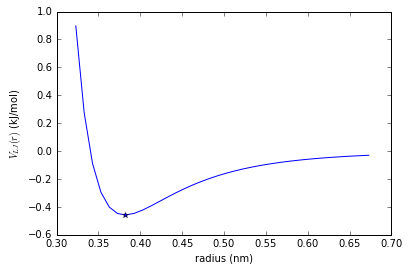

In [110]:
# LJ parameters for the carbon atom in AMBER
sigma = 3.39967e-01    # nm
epsilon = 4.57730e-01  # kJ/mol

r = np.arange(0.95*sigma, 2.0*sigma, 0.01)
V_LJ = 4.0*epsilon*( (sigma/r)**12.0 - (sigma/r)**6.0 )

r_min = 1.122462048*sigma
V_min = 4.0*epsilon*( (sigma/r_min)**12.0 - (sigma/r_min)**6.0 )


%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(r,V_LJ,'-')
plt.plot(r_min,V_min,'b*')
plt.xlabel('radius (nm)')
plt.ylabel('$V_{LJ}(r)$ (kJ/mol)')

In [111]:
## So, to match up the ligand to the LJ potential, the radius needs
## to be scaled to r_min = 1.122462048*sigma

r_min = 1.122462048*sigma

# scale all the coordinates to maximize LJ
icosahedron_radius = 2.0*np.sin(2.0*np.pi/5.0)
atoms = np.array( atoms )*r_min/icosahedron_radius

# the bond length that needs to be enforced needs to be scaled accordingly:
bond_length = 2.0*r_min/icosahedron_radius
print 'New bond length:', bond_length, 'nm'


New bond length: 0.401238042676 nm


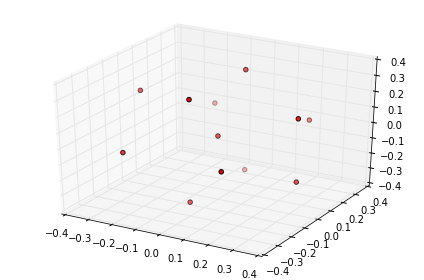

In [112]:
%matplotlib inline
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(atoms[:,0], atoms[:,1], atoms[:,2], c='r', marker='o')
#plt.figure( figsize=(5.5,5))

#for atom in atoms:
#    plt.plot(atom[0],atom[1],'o')
plt.tight_layout()

In [113]:
# write a PDB file

fout = open('test.pdb','w')

natoms = atoms.shape[0]
for i in range(natoms):
    x,y,z =  atoms[i,:]*10.0  # convert from nm to Angstrom
    outstr = 'ATOM     %2d  C%-2d DUM A   1     %7.3f %7.3f %7.3f  1.00  0.00           C'%(i+1,i+1,x,y,z) 
    print outstr
    fout.write(outstr+'\n')

fout.write('TER\nEND\n')
fout.close()

example_for_reference = """
ATOM      1  N   GLY A   1       1.260  26.360  21.910  1.00  0.00           N  
ATOM      2  H   GLY A   1       1.020  25.410  21.670  1.00  0.00           H  
ATOM      3  H2  GLY A   1       1.190  26.380  22.920  1.00  0.00           H  
"""

ATOM      1  C1  DUM A   1       0.000   2.006   3.246  1.00  0.00           C
ATOM      2  C2  DUM A   1       0.000  -2.006   3.246  1.00  0.00           C
ATOM      3  C3  DUM A   1       0.000   2.006  -3.246  1.00  0.00           C
ATOM      4  C4  DUM A   1       0.000  -2.006  -3.246  1.00  0.00           C
ATOM      5  C5  DUM A   1       2.006   3.246   0.000  1.00  0.00           C
ATOM      6  C6  DUM A   1      -2.006   3.246   0.000  1.00  0.00           C
ATOM      7  C7  DUM A   1       2.006  -3.246   0.000  1.00  0.00           C
ATOM      8  C8  DUM A   1      -2.006  -3.246   0.000  1.00  0.00           C
ATOM      9  C9  DUM A   1       3.246   0.000   2.006  1.00  0.00           C
ATOM     10  C10 DUM A   1      -3.246   0.000   2.006  1.00  0.00           C
ATOM     11  C11 DUM A   1       3.246   0.000  -2.006  1.00  0.00           C
ATOM     12  C12 DUM A   1       0.000   0.000   0.000  1.00  0.00           C


In [118]:
# Make a Gromacs gmx5 topology file
outfile = 'pocket.top'

toptext = """;
;       Topology file the pocket
;
; The force-field files to be included
#include "amber99sbnmr1-ildn.ff/forcefield.itp"

;[ defaults ]
; nbfunc        comb-rule       gen-pairs       fudgeLJ fudgeQQ
;1               2               yes             0.5     0.8333

[ atomtypes ]
; name      at.num  mass     charge ptype  sigma      epsilon
LJ           6      12.01    0.0000  A   3.39967e-01  4.57730e-01  ; copied from amber LJ

[ bondtypes ]
; i    j  func       b0          kb
  LJ LJ         1    %1.5f   259408.0 ; 7,(1986),230; AA, SUGARS


[ angletypes ]
;  i    j    k  func       th0       cth
LJ  LJ  LJ           1   108.000    150.0 ;  wide icosahedron angle IMPORTANT!

[ dihedraltypes ]
;i   j   k   l     func
 LJ  LJ  LJ  LJ    9       0.0      0.75312     3  ; Junmei et al, 1999
 LJ  LJ  LJ  LJ    9     180.0      1.04600     2  ; Junmei et al, 1999
 LJ  LJ  LJ  LJ    9     180.0      0.83680     1  ; Junmei et al, 1999


[ moleculetype ]
; name  nrexcl
Pocket         3

[ atoms ]
"""%bond_length

for i in range(natoms):
    toptext += "   %-2d LJ  1  DUM       C%-2d    %-2d    0.000000  12.01000   ; amber C  type\n"%(i+1,i+1,i+1)
toptext += '\n'
    
toptext += '[ bonds ]\n'
toptext += ';  ai   aj   funct   \n'
# Loop through all unique pairs of atoms 
npocket_atoms = natoms-1
for i in range(npocket_atoms-1):
    for j in range(i+1,npocket_atoms):
        
        # calculate the distance between the atoms
        r = atoms[i,:] - atoms[j,:]
        distance = np.sqrt( np.dot(r,r) )
        
        # only create bonds for atoms closer than the bond cutoff
        bond_cutoff = bond_length + 0.05 # nm
        if distance < bond_cutoff:
            toptext += '    %d  %d    1\n'%(i+1,j+1)
toptext += '\n'    

if UseIcosahedron:
    toptext += '[ angles ]\n'
    toptext += ';  ai   aj   ak     funct   \n'   
    # Loop through all unique triples of pocket atoms 
    for i in range(npocket_atoms-2):
        for j in range(i+1,npocket_atoms-1):
            for k in range(j+1,npocket_atoms):
                # calculate the angle between the atoms
                r_ji = atoms[i,:] - atoms[j,:] 
                r_jk = atoms[k,:] - atoms[j,:]
                distance_ji= np.sqrt( np.dot(r_ji,r_ji) )
                distance_jk = np.sqrt( np.dot(r_jk,r_jk) )
                cos_theta = np.dot(r_ji,r_jk)/(distance_ji*distance_jk)
                theta = np.arccos( cos_theta )*180/np.pi
                            
                # only create bonds for atoms closer than the bond cutoff
                if distance_ji < bond_cutoff:
                    if distance_jk < bond_cutoff:
                        # only reinforce wide icosahedron angles ~144 deg
                        if np.abs(theta - 108.0) < 2.0: # 2 deg tolerance                           
                            print i+1,j+1,k+1, distance_ji, distance_jk, 'theta', theta
                            toptext += '    %d  %d  %d    1\n'%(i+1,j+1,k+1)
    toptext += '\n'    


toptext += '; Include water topology\n'
toptext += '#include "amber99sbnmr1-ildn.ff/tip3p.itp"\n'
toptext += '\n'  

toptext += '; Include ion topology\n'
toptext += '#include "amber99sbnmr1-ildn.ff/ions.itp"\n'
toptext += '\n'  


toptext += '[ system ]\n'
toptext += 'Pocket in Water\n'
toptext += '\n'  


toptext += '[ molecules ]\n'
toptext += ';molecule name   nr.\n'
toptext += 'Pocket             1\n'

        
fout = open(outfile,'w')
fout.write(toptext)
fout.close()


1 2 7 0.401238042676 0.401238042676 theta 108.0
1 2 8 0.401238042676 0.401238042676 theta 108.0
1 5 11 0.401238042676 0.401238042676 theta 108.0
1 9 11 0.401238042676 0.401238042676 theta 108.0
2 7 11 0.401238042676 0.401238042676 theta 108.0
2 9 11 0.401238042676 0.401238042676 theta 108.0
3 4 7 0.401238042676 0.401238042676 theta 108.0
3 4 8 0.401238042676 0.401238042676 theta 108.0
3 5 9 0.401238042676 0.401238042676 theta 108.0
3 6 10 0.401238042676 0.401238042676 theta 108.0
4 7 9 0.401238042676 0.401238042676 theta 108.0
4 8 10 0.401238042676 0.401238042676 theta 108.0
5 6 10 0.401238042676 0.401238042676 theta 108.0
7 8 10 0.401238042676 0.401238042676 theta 108.0
